In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.arima_model import  ARMA
from scipy.stats.distributions import chi2
sns.set()
import warnings
warnings.filterwarnings("ignore")

In [19]:
raw_csv_data = pd.read_csv("Index2018.csv")
df_comp = raw_csv_data.copy()
df_comp.date = pd.to_datetime(df_comp.date, dayfirst=True)
df_comp.set_index("date", inplace=True)
df_comp = df_comp.asfreq('b')
df_comp = df_comp.fillna(method='ffill')
df_comp['market_value']=df_comp.ftse
df_comp = df_comp.drop(columns=['spx', 'dax', 'ftse', 'nikkei'])
size = int(len(df_comp)*0.8)
df, df_test = df_comp.iloc[:size], df_comp.iloc[size:]

In [20]:
df['returns'] = df.market_value.pct_change(1).mul(100)
df.head() #1st value NaN for returns
df = df.iloc[1:] #so we get rid of it

In [22]:
def LLR_test2(L1, L2, DF=1):
    LR = 2 * (L2-L1)
    return chi2.sf(LR,DF).round(3)  

Check if the timeseries is stationary - Fuller test

In [27]:
sts.adfuller(df.market_value) #2nd value is P, if >5% then insignificant => nonstationary

(-1.8928710132672926,
 0.33542220743298,
 6,
 5013,
 {'1%': -3.431655136974821,
  '5%': -2.8621167297421373,
  '10%': -2.567076993884522},
 54844.15842518015)

In [28]:
sts.adfuller(df.returns) #This one is stationary

(-12.77026571949725,
 7.798058336037823e-24,
 32,
 4987,
 {'1%': -3.431661944885779,
  '5%': -2.8621197374408225,
  '10%': -2.5670785949998973},
 15696.7672456975)

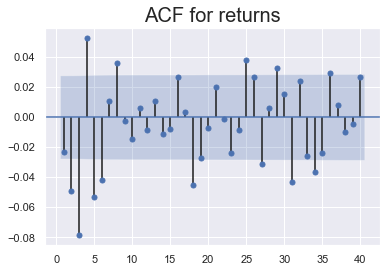

In [32]:
sgt.plot_acf(df.returns,lags=40,zero=False)
plt.title('ACF for returns', size=20);

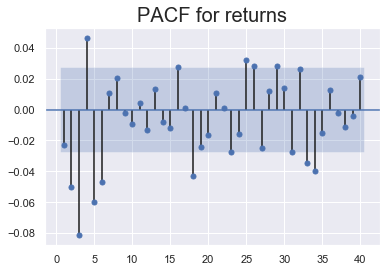

In [34]:
sgt.plot_pacf(df.returns,lags=40,zero=False)
plt.title('PACF for returns', size=20);

In [40]:
model_ret_ar_1=ARMA(df.returns, order=(1,0))
results_ret_ar_1=model_ret_ar_1.fit()
#results_ret_ar_1.summary()

model_ret_ar_2=ARMA(df.returns, order=(2,0))
results_ret_ar_2=model_ret_ar_2.fit()
results_ret_ar_2.summary()
LLR_test2(results_ret_ar_1.llf, results_ret_ar_2.llf, 1)

0.0

In [44]:
model_ret_ar_6=ARMA(df.returns, order=(6,0))
results_ret_ar_6=model_ret_ar_6.fit()
results_ret_ar_6.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(6, 0)   Log Likelihood               -7886.945
Method:                       css-mle   S.D. of innovations              1.164
Date:                Tue, 05 May 2020   AIC                          15789.890
Time:                        18:07:02   BIC                          15842.059
Sample:                    01-10-1994   HQIC                         15808.170
                         - 04-05-2013                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0189      0.013      1.414      0.157      -0.007       0.045
ar.L1.returns    -0.0245      0.014     -1.740      0.082      -0.052       0.003
ar.L2.returns    -0.0523      0.014     -3.716      0.000      -0.080      -0.025
ar.L3.returns    -0.0870      0.014     -6.174      0.000      -0.115      -0.059
ar.L4.returns     0.0424      0.014      3.009      0.003       0.015       0.070
ar.L5.returns    -0.0607      0.014     -4.309      0.000      -0.088      -0.033
ar.L6.returns    -0.0466      0.014     -3.302      0.001      -0.074      -0.019
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.2869           -0.9022j            1.5716           -0.0973
AR.2            1.2869           +0.9022j            1.5716            0.0973
AR.3           -0.0727           -1.5282j            1.5299           -0.2576
AR.4           -0.0727           +1.5282j            1.5299            0.2576
AR.5           -1.8659           -0.4836j            1.9275           -0.4596
AR.6           -1.8659           +0.4836j            1.9275            0.4596
-----------------------------------------------------------------------------
"""

In [46]:
model_ret_ar_7=ARMA(df.returns, order=(7,0))
results_ret_ar_7=model_ret_ar_7.fit()
results_ret_ar_7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(7, 0)   Log Likelihood               -7886.647
Method:                       css-mle   S.D. of innovations              1.164
Date:                Tue, 05 May 2020   AIC                          15791.294
Time:                        18:07:13   BIC                          15849.985
Sample:                    01-10-1994   HQIC                         15811.860
                         - 04-05-2013                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0189      0.014      1.399      0.162      -0.008       0.045
ar.L1.returns    -0.0240      0.014     -1.702      0.089      -0.052       0.004
ar.L2.returns    -0.0517      0.014     -3.663      0.000      -0.079      -0.024
ar.L3.returns    -0.0874      0.014     -6.202      0.000      -0.115      -0.060
ar.L4.returns     0.0433      0.014      3.064      0.002       0.016       0.071
ar.L5.returns    -0.0601      0.014     -4.263      0.000      -0.088      -0.032
ar.L6.returns    -0.0463      0.014     -3.282      0.001      -0.074      -0.019
ar.L7.returns     0.0109      0.014      0.772      0.440      -0.017       0.039
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.6490           -0.5384j            1.7347           -0.4498
AR.2           -1.6490           +0.5384j            1.7347            0.4498
AR.3           -0.1189           -1.4954j            1.5001           -0.2626
AR.4           -0.1189           +1.4954j            1.5001            0.2626
AR.5            1.2790           -0.9786j            1.6105           -0.1039
AR.6            1.2790           +0.9786j            1.6105            0.1039
AR.7            5.2269           -0.0000j            5.2269           -0.0000
-----------------------------------------------------------------------------
"""

In [47]:
LLR_test2(results_ret_ar_6.llf, results_ret_ar_7.llf, 1)

0.44

In [49]:
df['ret_res'] = results_ret_ar_6.resid #residuals of returns
df.head()

,market_value,returns,ret_res
date,,,
1994-01-10,3440.58,-0.156704,-0.175623
1994-01-11,3413.77,-0.779229,-0.802198
1994-01-12,3372.02,-1.222988,-1.270028
1994-01-13,3360.01,-0.356166,-0.466065
1994-01-14,3400.56,1.206842,1.061277


In [55]:
df.ret_res.mean(), df.ret_res.var(), np.sqrt(df.ret_res.var())

(-5.374743059711547e-05, 1.355980211077274, 1.1644656332744536)

In [57]:
sts.adfuller(df.ret_res) #P=0 => stationary signal, possibly gaussian noise

(-70.78380649111018,
 0.0,
 0,
 5019,
 {'1%': -3.4316535759402753,
  '5%': -2.8621160400844468,
  '10%': -2.567076626752987},
 15692.570833567926)

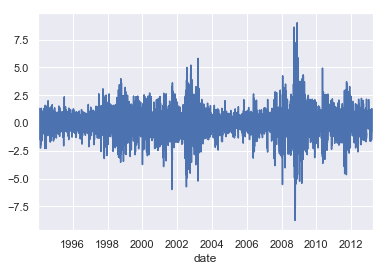

In [60]:
df.ret_res.plot(); #looks nearly like gaussian, except for housing market crash of 2009

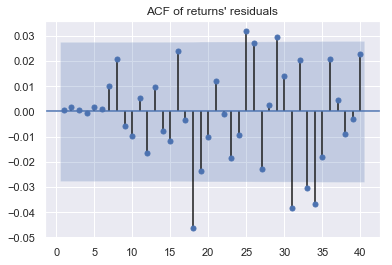

In [64]:
sgt.plot_acf(df.ret_res, zero=False, lags=40)
plt.title("ACF of returns' residuals");

### Moving average model
$$
r_t = c + \theta_1 \epsilon_{t-1} + \epsilon_t
$$
where

$\epsilon_t$ - current residual

$\epsilon_{t-1}$ - residuals for the past perios

$r_t$ - values of r in current period

$\theta_1$ - numeric coefficient for the value associated with the 1<sup>st</sup> lag

In [68]:
model_ret_ma_1=ARMA(df.returns, order=(0, 1)).fit()
model_ret_ma_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(0, 1)   Log Likelihood               -7929.595
Method:                       css-mle   S.D. of innovations              1.174
Date:                Tue, 05 May 2020   AIC                          15865.190
Time:                        18:39:23   BIC                          15884.754
Sample:                    01-10-1994   HQIC                         15872.045
                         - 04-05-2013                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0188      0.016      1.162      0.245      -0.013       0.050
ma.L1.returns    -0.0257      0.015     -1.720      0.085      -0.055       0.004
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1           38.8549           +0.0000j           38.8549            0.0000
-----------------------------------------------------------------------------
"""

In [69]:
model_ret_ma_2=ARMA(df.returns, order=(0, 2)).fit()
LLR_test2(model_ret_ma_1.llf, model_ret_ma_2.llf)

0.0